In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
import re

sns.set()


def gethighest(vals, prefix="logall_"):
        m = np.argmax([int(re.search(f'{prefix}(\d+)', val).group(1)) for val in vals])
        return vals[m]

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

        
def readparams(file):
    params = {} 
    with open(file) as f:
        for line in f:
            line = line[:-1]  # remove \n
            if not line or line.startswith('#') or line.startswith('import'):
                continue
            key, val = line.split('=')
            if val.lower() == 'true' or val.lower() == 'false':
                params[key] = val.lower() == 'true'
            else:
                try:
                    params[key] = float(val)
                except ValueError:
                    params[key] = val
    return params

In [222]:
from tqdm import tqdm_notebook
params = []
prefix = '../../../..'

paths = sorted(glob.glob(f"{prefix}/logs/lions-work*pop500*/**/rep00/", recursive=True) 
                   
                  )
for path in tqdm_notebook(paths):
    #print(path)
    try:
        logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    except Exception as e:
        print(e)
        continue
    #print('*-*-*')
    curparam = readparams(glob.glob(path + 'properties*')[0])
    params.append((path, curparam, logall.query(f'nbOnOpp == {curparam["nOpti"]}')['curCoopNoCoef'].mean()))



In [223]:
diffkeys = set()
missingkeys = set()
for i in range(len(params)):
    for key in params[i][1].keys():
        try:
            if any(params[j][1][key] != params[i][1][key] for j in range(0, len(params) - 1)):
                diffkeys.add(key)
        except KeyError:
            missingkeys.add(key)

In [224]:
excluded = ['gSeed', 'gLogFilename', 'path']
processed = []
for elem in params:
    param = elem[1]
    ess = param['meanA'] / 2
    so = param['meanA'] + param['b'] / 2
    outdict = {'coop': (elem[2] - ess) / (so - ess) , 'truecoop': elem[2]}
    for key in diffkeys:
        if key in excluded: continue
        outdict[key] = elem[1][key]
    processed.append(outdict)
    for key in missingkeys:
        if key in excluded: continue
        outdict[key] = elem[1].get(key, False)
df = pd.DataFrame(processed)
normalized_df=(df-df.mean())/df.std()

In [225]:
df

,coop,gNbOfPhysicalObjects,gRandomSeed,nOpti,truecoop
0,0.092481,300.0,-6.495291e+08,2.0,3.193609e+00
1,-0.147301,300.0,-6.495278e+08,2.0,1.395244e+00
2,NaN,50.0,-2.314684e+08,2.0,NaN
3,-0.293590,50.0,-2.314683e+08,2.0,2.980720e-01
4,-0.333333,100.0,1.471040e+09,2.0,1.158500e-06
5,-0.322468,100.0,1.471040e+09,2.0,8.148750e-02
6,-0.100974,150.0,1.612650e+09,2.0,1.742695e+00
7,0.020853,150.0,1.612651e+09,2.0,2.656395e+00
8,0.123099,200.0,5.577201e+08,2.0,3.423240e+00
9,0.516399,200.0,5.577200e+08,2.0,6.372990e+00


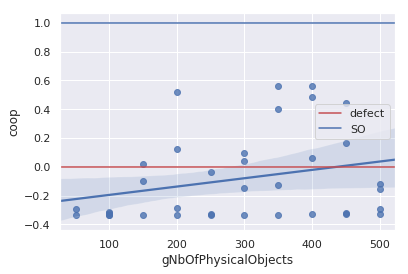

In [229]:
sns.regplot(x='gNbOfPhysicalObjects', y='coop', data=df)
plt.axhline(0, label='defect', c='r')
plt.axhline(1, label='SO', c='b')
plt.legend()

In [230]:
import statsmodels.formula.api as sm

In [228]:
normalized_df['nbRobots'] = normalized_df['gInitialNumberOfRobots']
normalized_df

KeyError: 'gInitialNumberOfRobots'

In [231]:
sns.regplot(x='nbRobots', y='coop', data=normalized_df)

KeyError: 'nbRobots'

In [235]:
result = sm.ols(formula="coop ~ gNbOfPhysicalObjects + nOpti", data=normalized_df).fit()

In [236]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coop   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.955
Date:                Tue, 23 Jul 2019   Prob (F-statistic):             0.0660
Time:                        17:42:26   Log-Likelihood:                -47.609
No. Observations:                  36   AIC:                             101.2
Df Residuals:                      33   BIC:                             106.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0483      0.159     -0.303      0.764      -0.373       0.276
gNbOfPhysicalObjects     0.2860      0.165      1.730      0.093      -0.050       0.622
nOpti                   -0.2840      0.160     -1.770      0.086      -0.610       0.042
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.892
Skew:                           0.796   Prob(JB):                        0.143
Kurtosis:                       2.756   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
df

,coop,gNbOfPhysicalObjects,gRandomSeed,nOpti,truecoop
0,0.092481,300.0,-6.495291e+08,2.0,3.193609e+00
1,-0.147301,300.0,-6.495278e+08,2.0,1.395244e+00
2,NaN,50.0,-2.314684e+08,2.0,NaN
3,-0.293590,50.0,-2.314683e+08,2.0,2.980720e-01
4,-0.333333,100.0,1.471040e+09,2.0,1.158500e-06
5,-0.322468,100.0,1.471040e+09,2.0,8.148750e-02
6,-0.100974,150.0,1.612650e+09,2.0,1.742695e+00
7,0.020853,150.0,1.612651e+09,2.0,2.656395e+00
8,0.123099,200.0,5.577201e+08,2.0,3.423240e+00
9,0.516399,200.0,5.577200e+08,2.0,6.372990e+00
